Part1

BO used in music volume preference

In [ ]:
!pip install GPy
!pip install GPyOpt
!pip install matplotlib==3.1.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=3420163 sha256=7a195cc0ce2d2f366599a8603bd728ca3575970139feccf3031002f10bb731f1
  Stored in directory: /root/.cache/pip/wheels/27/bd/9f/82ab4216eae088cba864ca0dc1d75699bd4bf6823790fb2f77
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102544 sha256=fd9db3e5a7cbdeb729c5c3c2992fce640b11ab8c902eebe580517400411212c7
  Stored in directory: /root/.cache/pip/wheels/d2/ef/9c/da9ceef7d0ff5287c24365844fc394852c2b79ac3fcf33bf8b
Successfully built GPy paramz
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-py3-none-any.whl size=83588 s

BO

In [ ]:
import GPy
import GPyOpt
import numpy as np
import matplotlib.pyplot as plt

# objective function
def simulated_user_preference(volume):
    return -10 * np.exp(-0.5 * ((volume - 65)**2) / (2 * 10**2)) + np.random.normal(0, 0.5)

# BO
bounds = [{'name': 'volume', 'type': 'continuous', 'domain': (0, 100)}]
myBopt = GPyOpt.methods.BayesianOptimization(
    f=simulated_user_preference,
    domain=bounds,
    acquisition_type='EI',
    exact_feval=False,
    normalize_Y=False,
    initial_design_numdata=5
)
max_iter = 10

#run and plot
for i in range(max_iter):
    myBopt.run_optimization(max_iter=1, verbosity=False)
    myBopt.plot_acquisition()

# result
optimized_volume_level = myBopt.x_opt
optimized_user_preference_value = myBopt.fx_opt
print(f'preference volume: {optimized_volume_level}')
print(f'preference rating: {-optimized_user_preference_value}')


KeyboardInterrupt caught, calling on_optimization_end() to round things up


KeyboardInterrupt: ignored

Part2

BO with experiment

Volume: 69.64691855978616
Volume: 68.05450437462201


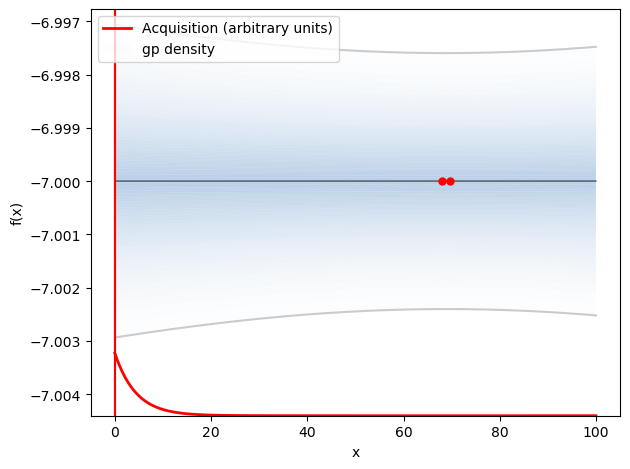

Volume: 0.006783831227508141


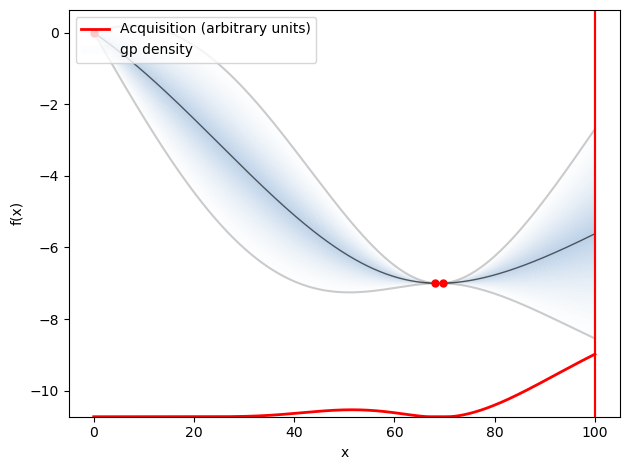

Volume: 100.0


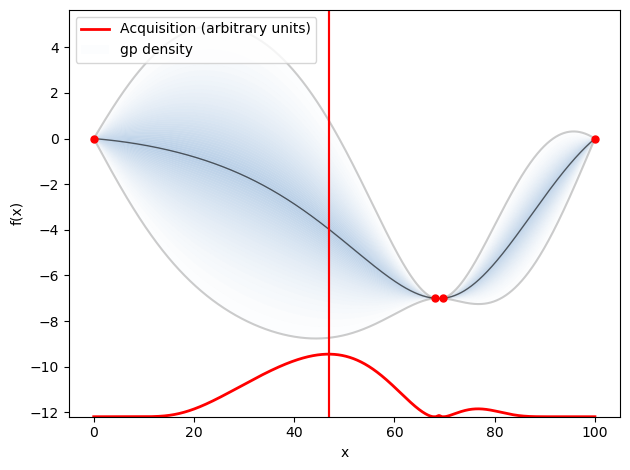

Volume: 46.87278094601456


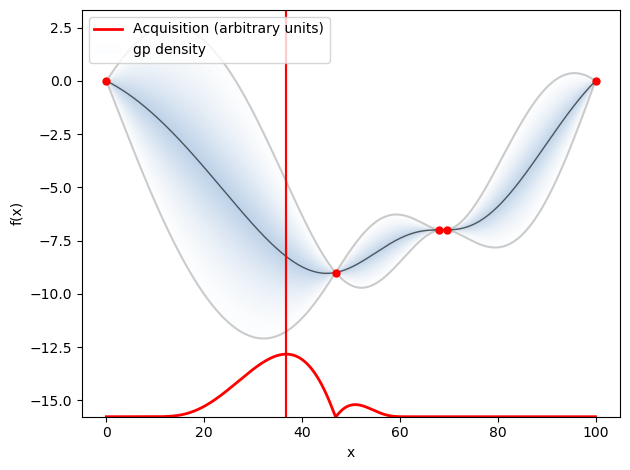

Volume: 36.77007817158644


In [ ]:
import numpy as np
import GPyOpt
from numpy.random import seed
import matplotlib.pyplot as plt

# rate
def f_u(volume):
    print(f"Volume: {volume[0][0]}")
    res = input("rate this volume(0 to 10): ")
    return -float(res)

# BO
def run_bo(max_iter):
    bounds = [{'name': 'volume', 'type': 'continuous', 'domain': (0, 100)}]
    myBopt = GPyOpt.methods.BayesianOptimization(
        f=f_u,
        domain=bounds,
        acquisition_type='EI',
        exact_feval=True,
        normalize_Y=False,
        initial_design_numdata=1,
    )

#test and show
    for i in range(max_iter):
        myBopt.run_optimization(max_iter=1, verbosity=False)
        myBopt.plot_acquisition()
    return myBopt

# main part
if __name__ == "__main__":
    seed(123)  # 设定随机种子
    n_iter = 10  # 设定迭代次数

    bo = run_bo(n_iter)
    bo_volume_levels, bo_satisfaction_scores = bo.get_evaluations()
    optimized_volume = bo.x_opt
    optimized_rating = -bo.fx_opt
    print(f'preference volume: {optimized_volume[0]}')
    print(f'preference volume rating: {optimized_rating}')
